<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable



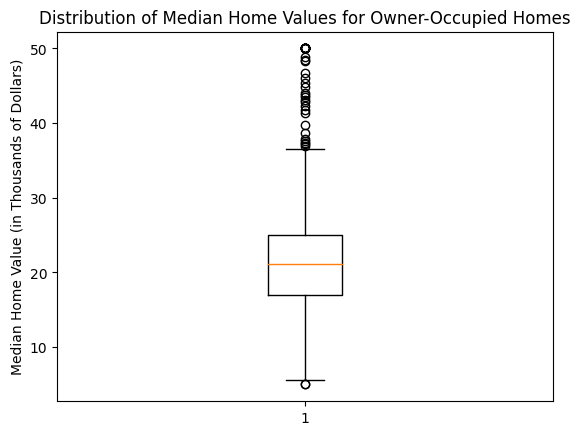

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(boston_df['MEDV'],)
plt.title('Distribution of Median Home Values for Owner-Occupied Homes')
plt.ylabel('Median Home Value (in Thousands of Dollars)')
plt.show()

In the boxplot analysis of MEDV, it appears that there are some outliers with values exceeding 40. These data points stand out as potential anomalies or extreme values in the distribution of median home values, and may warrant further investigation.

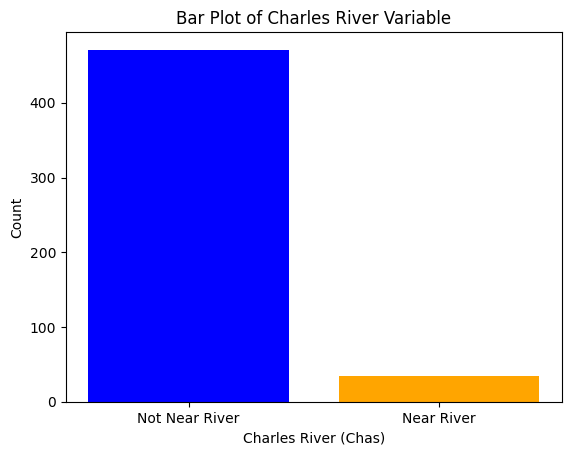

Index([0.0, 1.0], dtype='float64', name='CHAS')

In [ ]:
chas_counts = boston_df['CHAS'].value_counts()


plt.bar(chas_counts.index, chas_counts.values, color=['blue', 'orange'])


plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (Chas)')
plt.ylabel('Count')
plt.xticks(chas_counts.index, labels=['Not Near River', 'Near River'])
plt.show()
chas_counts.index

Index([0.0, 1.0], dtype='float64', name='CHAS')
The barplot of the Charles River suggests that a significant proportion of the dataset corresponds to areas located away from the Charles River.

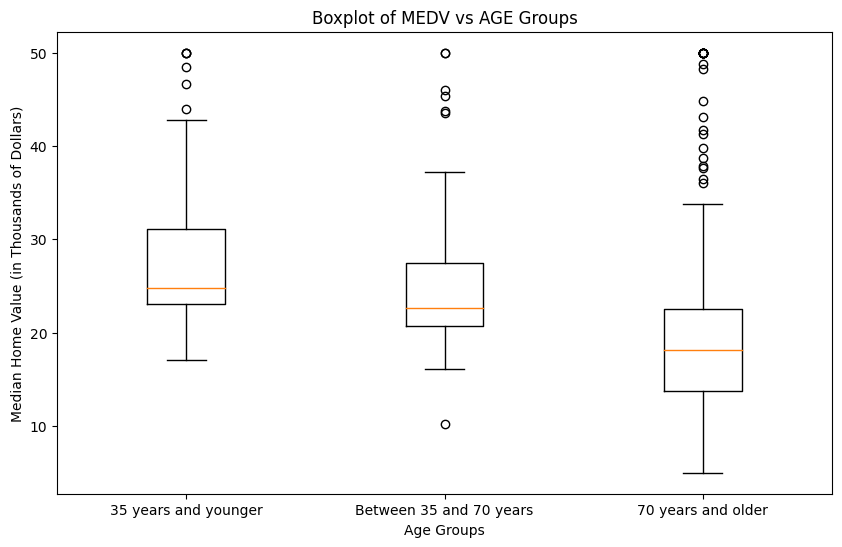

In [ ]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([boston_df[boston_df['AGE_Group'] == label]['MEDV'] for label in labels], labels=labels)

# Customize the boxplot (optional)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Home Value (in Thousands of Dollars)')
plt.show()

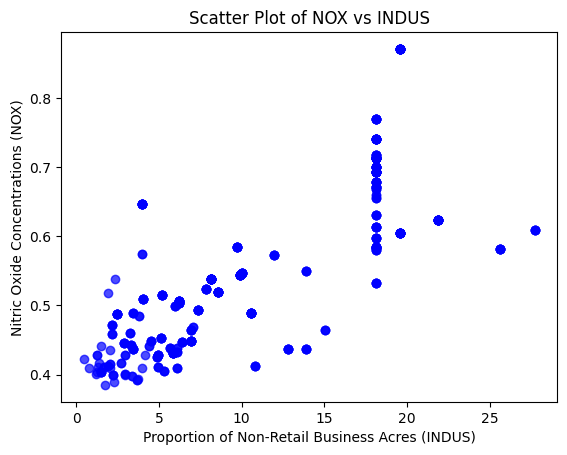

In [ ]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue', alpha=0.7)

# Customize the scatter plot (optional)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')

# Show the plot
plt.show()

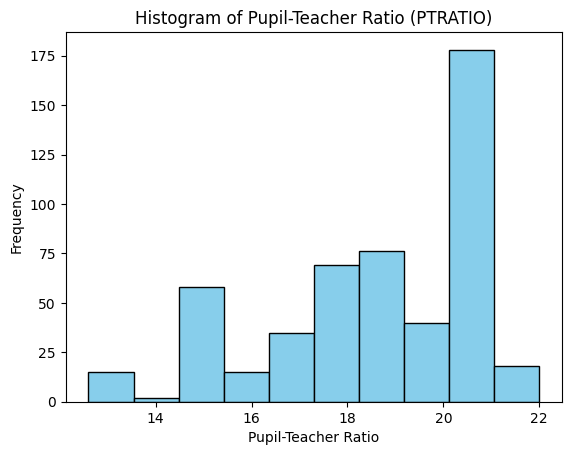

In [ ]:
plt.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')

# Customize the histogram (optional)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [ ]:
frequencies = boston_df['PTRATIO'].value_counts().reset_index().rename(columns={'count': 'Count'})


total_values = sum(frequencies['Count'])
frequencies['Percentage'] = (frequencies['Count'] / total_values) * 100

frequencies

,PTRATIO,Count,Percentage
0,20.2,140,27.667984
1,14.7,34,6.719368
2,21.0,27,5.335968
3,17.8,23,4.545455
4,19.2,19,3.754941
5,17.4,18,3.557312
6,18.6,17,3.359684
7,19.1,17,3.359684
8,18.4,16,3.162055
9,16.6,16,3.162055


In [ ]:
from scipy.stats import ttest_ind


chas_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = ttest_ind(chas_bounded, chas_not_bounded)

# Check the p-value
print('p-value:', p_value)

p-value: 7.390623170519905e-05


p-value: 7.390623170519905e-05
With a p-value of 7.39e-05, which is much smaller than a typical significance level of 0.05, we have strong evidence to reject the null hypothesis. This suggests that there is a significant difference in median values of houses between areas bounded and not bounded by the Charles River. The result implies that the Charles River variable is associated with a significant difference in the median values of houses.

In [ ]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV'],
                            boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV'],
                            boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV'])

# Check the p-value
print('p-value:', p_value)

p-value: 1.7105011022702984e-15



p-value: 1.7105011022702984e-15
The very small p-value suggests that we have sufficient evidence to reject the null hypothesis, indicating that there is a significant difference in median values of houses across the various proportions of owner-occupied units built before 1940. In other words, the variable 'AGE' appears to be associated with a significant difference in the median values of houses.

In [ ]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Check the correlation coefficient and p-value
print('Pearson Correlation Coefficient:', correlation_coefficient)
print('p-value:', p_value)

Pearson Correlation Coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98


Pearson Correlation Coefficient: 0.7636514469209158
p-value: 7.91336106123623e-98
With a Pearson Correlation Coefficient of 0.76 and an extremely small p-value of 7.91e-98, we have strong evidence against the null hypothesis that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

Intercept (beta_0): 18.39008833049338
Coefficient for DIS (beta_1): 1.0916130158411106


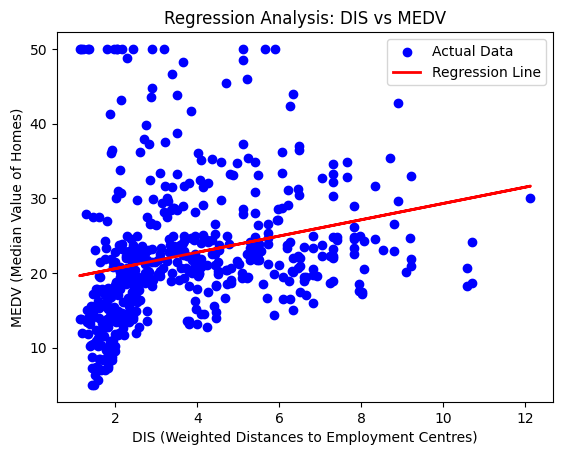

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare the data for regression analysis
X = boston_df[['DIS']]  # Independent variable
y = boston_df['MEDV']     # Dependent variable

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Obtain coefficients
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Print coefficients
print('Intercept (beta_0):', beta_0)
print('Coefficient for DIS (beta_1):', beta_1)

# Plot the regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis: DIS vs MEDV')
plt.xlabel('DIS (Weighted Distances to Employment Centres)')
plt.ylabel('MEDV (Median Value of Homes)')
plt.legend()
plt.show()